<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 01**
First, we upload the data and save it into an appropriate matrix.

In [6]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv"
df = pd.read_csv(url)

x = df['x'].values
y = df['y'].values
z = df['z'].values
cl = df['class'].values

X_matrix = np.column_stack((x, y, z))
print(X_matrix)

[[ 6.47688540e-01 -1.38264300e-01  3.51229946e+00]
 [-2.34136960e-01 -2.34153370e-01  1.07694474e+01]
 [-4.69474390e-01  7.67434730e-01  1.11667209e+01]
 [-4.65729750e-01 -4.63417690e-01  3.83647886e+00]
 [-1.72491783e+00 -1.91328024e+00  1.71093163e+00]
 [ 3.14247330e-01 -1.01283112e+00 -3.97597325e+00]
 [ 1.46564877e+00 -1.41230370e+00 -6.42069981e+00]
 [-1.42474819e+00  6.75282000e-02 -1.59647953e+00]
 [-1.15099358e+00  1.10922590e-01 -3.84936716e+00]
 [-2.91693750e-01 -6.00638690e-01  2.65658616e+00]
 [-1.34972200e-02  1.85227818e+00 -4.25470826e+00]
 [-1.22084365e+00  8.22544910e-01 -7.47914570e+00]
 [-1.32818605e+00 -1.95967012e+00  1.47688864e+00]
 [ 1.71368280e-01  7.38466580e-01  1.39201915e+00]
 [-1.47852199e+00 -3.01103700e-01 -8.17756850e-01]
 [ 1.05712223e+00 -4.60638770e-01 -5.09006721e+00]
 [ 3.24083970e-01 -1.76304016e+00  2.42974823e+00]
 [ 6.11676290e-01 -6.76922000e-01 -2.72294292e+00]
 [-8.39217520e-01  9.31280120e-01  7.29026754e+00]
 [ 9.75545130e-01  3.31263430e-

We center and standardize the data before applying PCA. Then, we find the two principal components.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Center and standardize the data before applying PCA
scaler = StandardScaler()
X_matrix = scaler.fit_transform(X_matrix)

# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components = 2)
XV = pca.fit_transform(X_matrix)

We visualize the results in a 2D plot using these components.

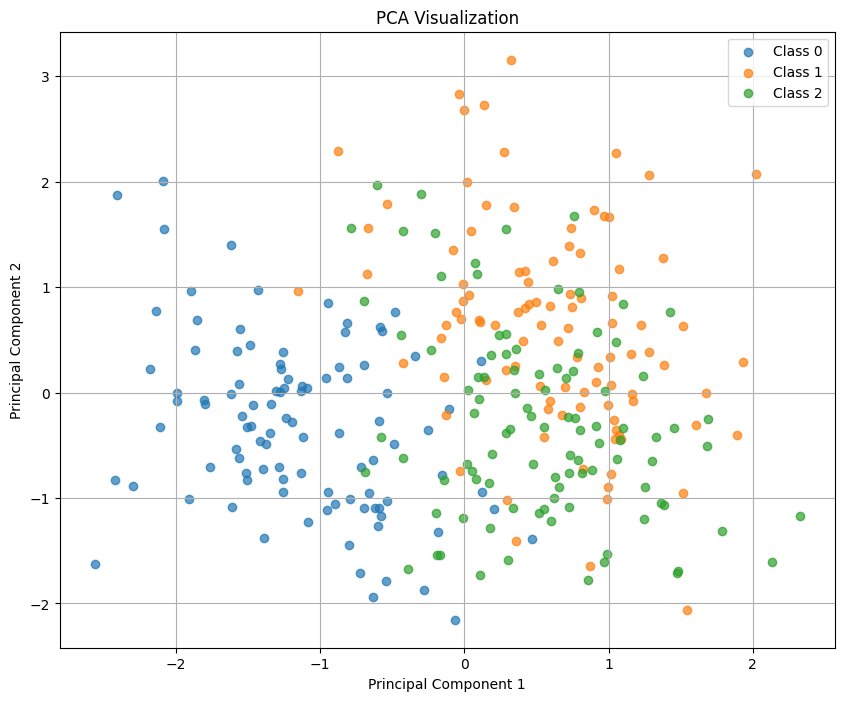

In [3]:
import matplotlib.pyplot as plt

# Plot the PCA results with color coding by class
plt.figure(figsize=(10, 8))
classes = np.unique(cl)
for cls in classes:
    plt.scatter(XV[cl == cls, 0], XV[cl == cls, 1], label=f'Class {cls}', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.title("PCA Visualization")
plt.show()

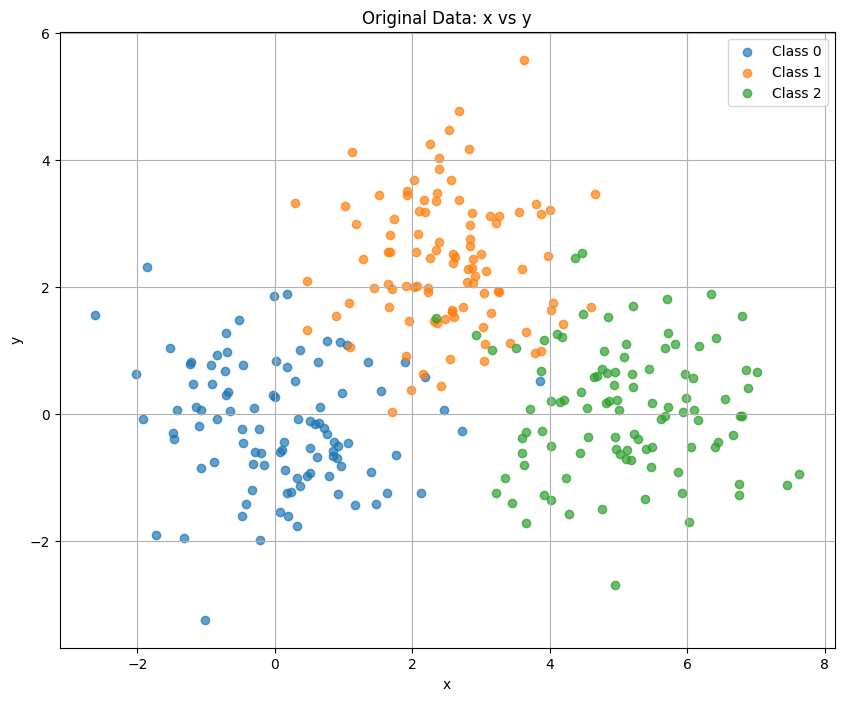

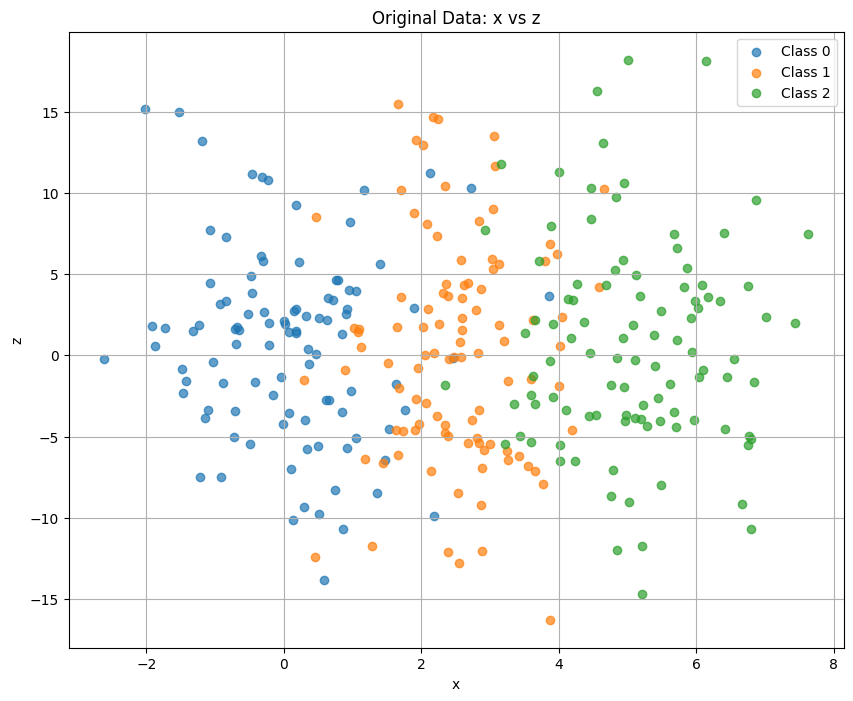

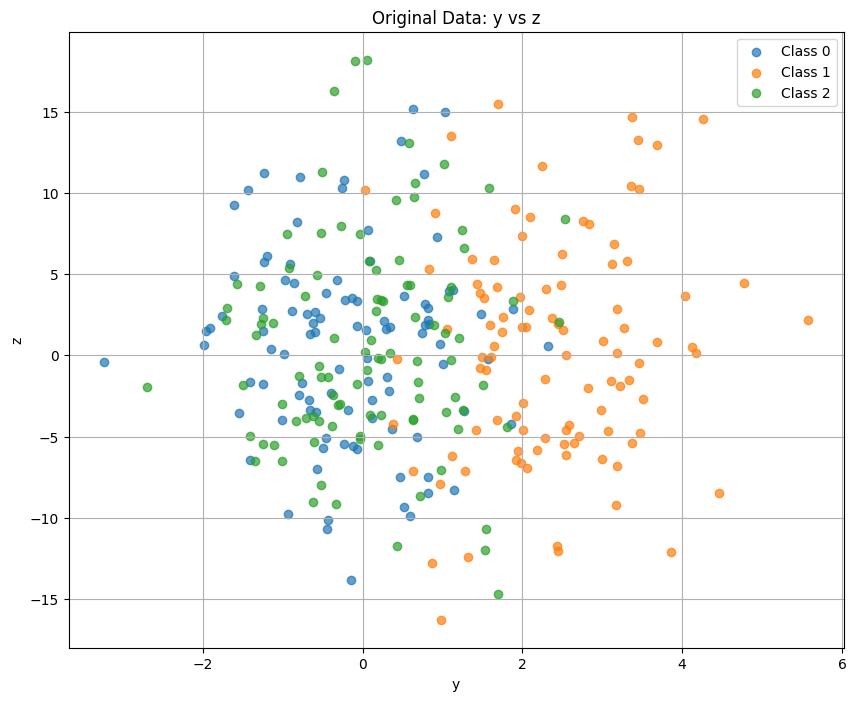

In [4]:
# Plot x vs y
plt.figure(figsize=(10, 8))
for cls in classes:
    plt.scatter(x[cl == cls], y[cl == cls], label=f'Class {cls}', alpha=0.7)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Original Data: x vs y")
plt.show()

# Plot x vs z
plt.figure(figsize=(10, 8))
for cls in classes:
    plt.scatter(x[cl == cls], z[cl == cls], label=f'Class {cls}', alpha=0.7)

plt.xlabel("x")
plt.ylabel("z")
plt.legend()
plt.grid(True)
plt.title("Original Data: x vs z")
plt.show()

# Plot y vs z
plt.figure(figsize=(10, 8))
for cls in classes:
    plt.scatter(y[cl == cls], z[cl == cls], label=f'Class {cls}', alpha=0.7)

plt.xlabel("y")
plt.ylabel("z")
plt.legend()
plt.grid(True)
plt.title("Original Data: y vs z")
plt.show()

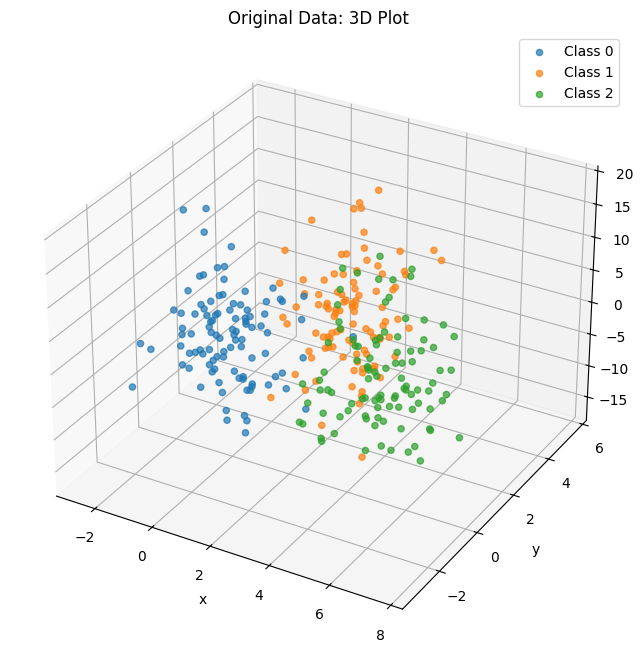

In [5]:
# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cls in classes:
    ax.scatter(x[cl == cls], y[cl == cls], z[cl == cls], label=f'Class {cls}', alpha=0.7)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Original Data: 3D Plot")
plt.legend()
plt.show()

**Primary Question: Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**

In this case, PCA does not improve cluster separation because the original feature space already provides meaningful separation. PCA focuses on maximizing variance rather than explicitly improving clustering, and if the clusters are not aligned with the principal components, the transformation might not reduce the separation.

**Secondary Question: Why is standardization necessary before applying PCA?**

Standardization is necessary before applying PCA because this method is sensitive to the scale of the data. Differences in scale among features can significantly impact the direction of the principal components in PCA. If the variables in the dataset have different units or ranges, variables with larger scales can dominate the principal components. By standardizing the features, the scales of the features are equalized. This allows the principal components to better reflect the true relationships and patterns in the data, without being influenced by the differences in the scales of the features.

